# WeatherPy

---

## Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List Using the citipy Library

In [2]:
# Empty list for holding the latitude adn longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a out cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


----

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated

In [3]:
from api_keys import weather_api_key


In [4]:
# Set the API base url

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i,city in enumerate(cities):
# for city in cities:
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        
    # Create endpoint URL with each city
    city_url = query_url + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    
    # Run an API request for each of the cities
    try:   
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
    
        # Parse out latitude,longitude,max temp,humidity,cloudiness, windspeed, country
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City":city,
                         "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date })
    
    # If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass        

# Indicate that Data Loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | dakhla
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | magdagachi
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | gaspe
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kill devil hills
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | zeya
Processing Record 14 of Set 1 | espargos
City not found. Skipping...
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | illizi
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | nouadhibou
Processing Record 19 of Set 1 | kemijarvi
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | weno
Processing Record 22 of Set 1 | san jose village

Processing Record 38 of Set 4 | kenai
Processing Record 39 of Set 4 | la passe
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | at taj
Processing Record 42 of Set 4 | la palma
Processing Record 43 of Set 4 | rongelap
Processing Record 44 of Set 4 | port saint john's
Processing Record 45 of Set 4 | chonchi
Processing Record 46 of Set 4 | puerto aysen
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | happy valley-goose bay
Processing Record 49 of Set 4 | kant
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | minas de marcona
Processing Record 2 of Set 5 | smach mean chey
City not found. Skipping...
Processing Record 3 of Set 5 | mcalester
Processing Record 4 of Set 5 | doka
Processing Record 5 of Set 5 | vorgashor
Processing Record 6 of Set 5 | novaya igirma
Processing Record 7 of Set 5 | ponta delgada
Processing Record 8 of Set 5 | maua
Processing Record 9 of Set 5 | urdinarrain
Processing Record 10 of Set 5 | hamilton
Proce

City not found. Skipping...
Processing Record 29 of Set 8 | taro
Processing Record 30 of Set 8 | sumbawanga
Processing Record 31 of Set 8 | grand falls-windsor
Processing Record 32 of Set 8 | ovalle
Processing Record 33 of Set 8 | sheregesh
Processing Record 34 of Set 8 | guadalupe y calvo
Processing Record 35 of Set 8 | mount pearl
Processing Record 36 of Set 8 | soc trang
Processing Record 37 of Set 8 | louga
Processing Record 38 of Set 8 | port-vila
Processing Record 39 of Set 8 | zouerate
Processing Record 40 of Set 8 | safotu
Processing Record 41 of Set 8 | bekovo
Processing Record 42 of Set 8 | pollenca
Processing Record 43 of Set 8 | saint croix
Processing Record 44 of Set 8 | lupane
Processing Record 45 of Set 8 | sangonera la verde
Processing Record 46 of Set 8 | lembar
City not found. Skipping...
Processing Record 47 of Set 8 | bantay
Processing Record 48 of Set 8 | karratha
Processing Record 49 of Set 8 | puerto baquerizo moreno
Processing Record 0 of Set 9 | sainte-anne-des

Processing Record 16 of Set 12 | mata-utu
Processing Record 17 of Set 12 | ust'-charyshskaya pristan'
Processing Record 18 of Set 12 | savannakhet
Processing Record 19 of Set 12 | bengkulu
Processing Record 20 of Set 12 | hasaki
Processing Record 21 of Set 12 | vuktyl
Processing Record 22 of Set 12 | pervomayskoye
Processing Record 23 of Set 12 | kapuskasing
Processing Record 24 of Set 12 | nagqu
Processing Record 25 of Set 12 | kuanda
Processing Record 26 of Set 12 | yen vinh
Processing Record 27 of Set 12 | camayenne
Processing Record 28 of Set 12 | waingapu
Processing Record 29 of Set 12 | bandundu
Processing Record 30 of Set 12 | cortez
Processing Record 31 of Set 12 | severo-yeniseyskiy
Processing Record 32 of Set 12 | samana
Processing Record 33 of Set 12 | lagonegro
Processing Record 34 of Set 12 | betio village
Processing Record 35 of Set 12 | ayaguz
City not found. Skipping...
Processing Record 36 of Set 12 | kingscliff
Processing Record 37 of Set 12 | abadeh
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.85,85,100,6.88,PN,1691088548
1,utrik,11.2278,169.8474,28.57,76,72,7.00,MH,1691088562
2,dakhla,23.6848,-15.9580,24.01,73,2,13.89,EH,1691088762
3,stanley,54.8680,-1.6985,15.99,92,40,0.51,GB,1691088574
4,magdagachi,53.4500,125.8000,10.96,70,99,1.89,RU,1691088914


In [7]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv",index_label="City_ID")

In [8]:
# Read saved data

city_data_df=pd.read_csv("cities.csv",index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.85,85,100,6.88,PN,1691088548
1,utrik,11.2278,169.8474,28.57,76,72,7.00,MH,1691088562
2,dakhla,23.6848,-15.9580,24.01,73,2,13.89,EH,1691088762
3,stanley,54.8680,-1.6985,15.99,92,40,0.51,GB,1691088574
4,magdagachi,53.4500,125.8000,10.96,70,99,1.89,RU,1691088914


### Create the Scatter Plot

#### Latitude vs. Temperature

In [34]:
# Define a function plot scatter plots:

def plot_scatter(y_axis, ylabel, title):

    plt.scatter(city_data_df["Lat"],y_axis,edgecolor ="black")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

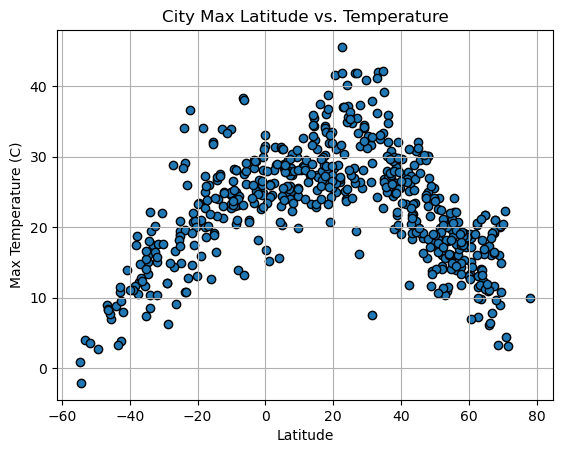

In [35]:
y_axis = city_data_df["Max Temp"]

plot_scatter(y_axis, "Max Temperature (C)", "City Max Latitude vs. Temperature")
plt.savefig("Fig01.png")
plt.show()

#### Latitude vs. Humidity

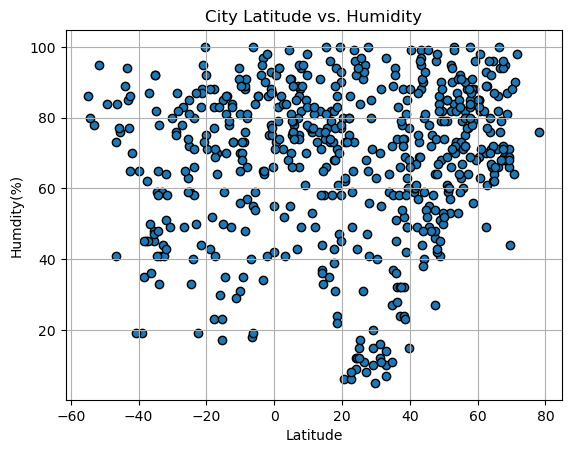

In [37]:
y_axis = city_data_df["Humidity"]

plot_scatter(y_axis, "Humdity(%)", "City Latitude vs. Humidity")

plt.savefig("Fig2.png")

plt.show()

#### Latitude vs. Cloudiness

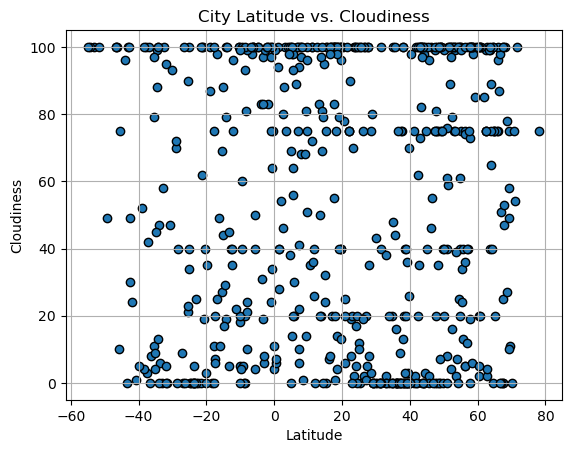

In [38]:
y_axis = city_data_df["Cloudiness"]

plot_scatter(y_axis, "Cloudiness", "City Latitude vs. Cloudiness")
plt.savefig("Fig3.png")
plt.show()

#### Latitude vs. Wind Speed

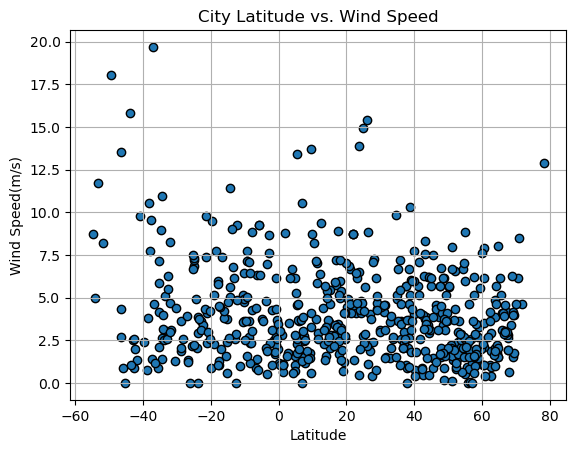

In [39]:
y_axis=city_data_df["Wind Speed"]

plot_scatter(y_axis, "Wind Speed(m/s)", "City Latitude vs. Wind Speed")
plt.savefig("Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,28.57,76,72,7.00,MH,1691088562
2,dakhla,23.6848,-15.9580,24.01,73,2,13.89,EH,1691088762
3,stanley,54.8680,-1.6985,15.99,92,40,0.51,GB,1691088574
4,magdagachi,53.4500,125.8000,10.96,70,99,1.89,RU,1691088914
5,iskateley,67.6803,53.1512,20.97,69,47,1.95,RU,1691088593


In [15]:
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
southern_hemi_df.head()                      

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.85,85,100,6.88,PN,1691088548
7,punta arenas,-53.1500,-70.9167,3.97,78,100,11.69,CL,1691088276
9,san antonio de pale,-1.4014,5.6325,22.50,75,100,2.54,GQ,1691088657
22,mazagao,-0.1150,-51.2894,33.03,42,4,1.97,BR,1691088918
28,afaahiti,-17.7500,-149.2833,24.93,77,11,5.96,PF,1691088597


# Temperature vs. Latitude Linear Regression Plot

In [16]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_axis, y_axis, ylabel, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    print(f"The r-value is : {rvalue**2}.")
    plt.show()
    

In [17]:
# # Define a function to create Linear Regression plots
# def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
#     # Compute linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#     # Plot
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
#     plt.xlabel("Latitude")
#     plt.ylabel(title)
#     print(f"The r-value is: {rvalue**2}")
#     plt.show()

The r-value is : 0.4081295000564413.


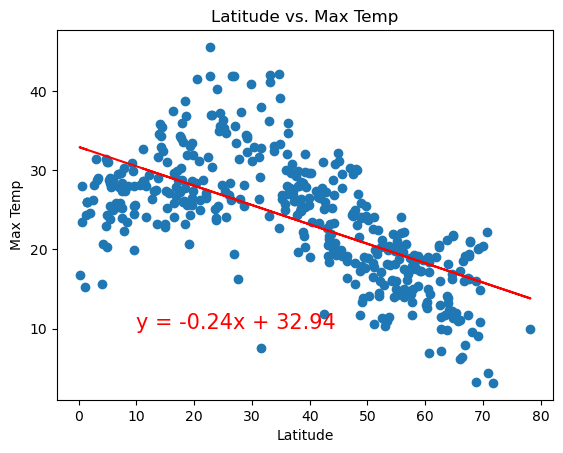

In [18]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plot_linear_regression(x_axis,y_axis,"Max Temp","Latitude vs. Max Temp",(10,10))



The r-value is : 0.6128346066878484.


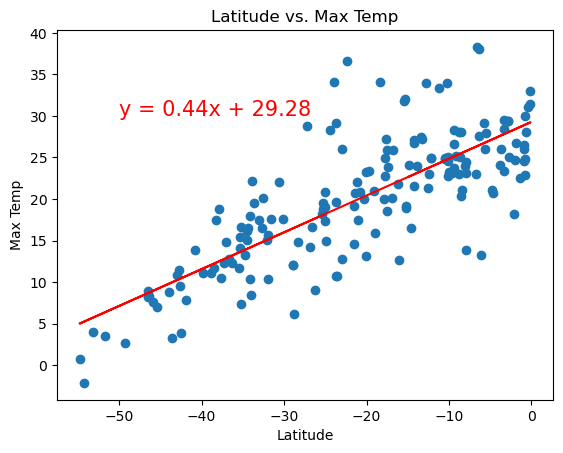

In [19]:
# Southern hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]

plot_linear_regression(x_axis,y_axis,'Max Temp',"Latitude vs. Max Temp",(-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Humidity vs. Latitude Linear Regreesion Plot

The r-value is : 0.010728500621486345.


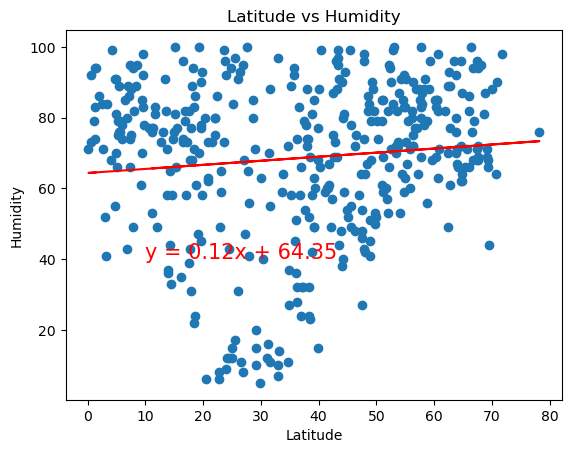

In [20]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]

plot_linear_regression(x_axis,y_axis,"Humidity","Latitude vs Humidity",(10,40))

The r-value is : 0.007017712302355516.


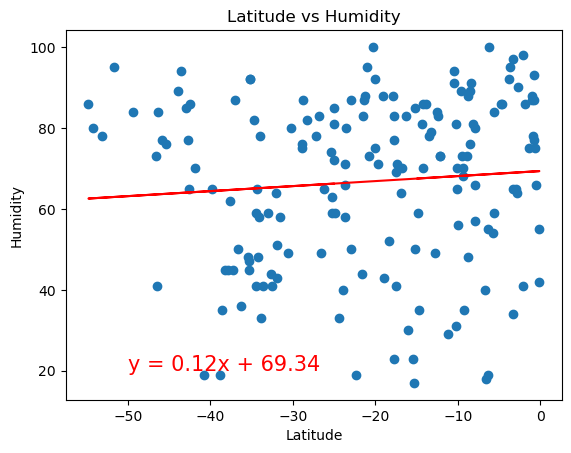

In [21]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]

plot_linear_regression(x_axis,y_axis,"Humidity","Latitude vs Humidity",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Cloudiness vs. Latitude Linear Regression Plot

In [26]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,28.57,76,72,7.00,MH,1691088562
2,dakhla,23.6848,-15.9580,24.01,73,2,13.89,EH,1691088762
3,stanley,54.8680,-1.6985,15.99,92,40,0.51,GB,1691088574
4,magdagachi,53.4500,125.8000,10.96,70,99,1.89,RU,1691088914
5,iskateley,67.6803,53.1512,20.97,69,47,1.95,RU,1691088593


The r-value is : 4.088732105529857e-05.


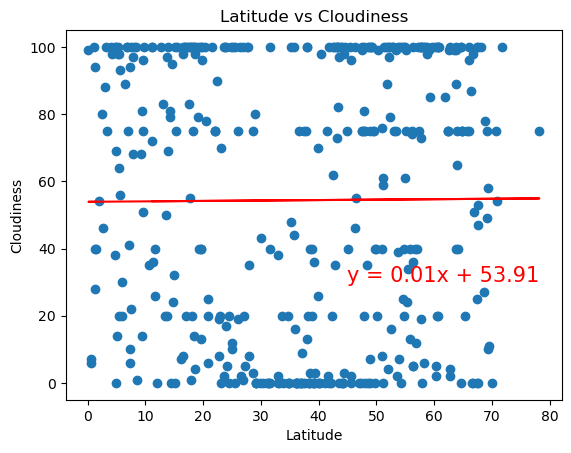

In [22]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis,y_axis,"Cloudiness","Latitude vs Cloudiness",(45,30))

The r-value is : 0.00048759552613606447.


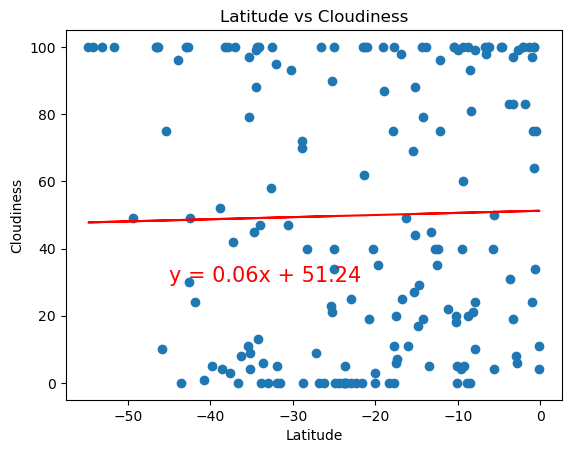

In [23]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis,y_axis,"Cloudiness","Latitude vs Cloudiness",(-45,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.009703212790562509.


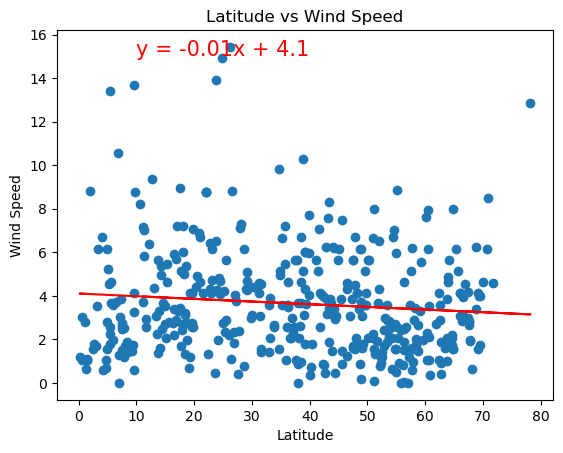

In [24]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis,y_axis,"Wind Speed","Latitude vs Wind Speed",(10,15))

The r-value is : 0.03436631750088771.


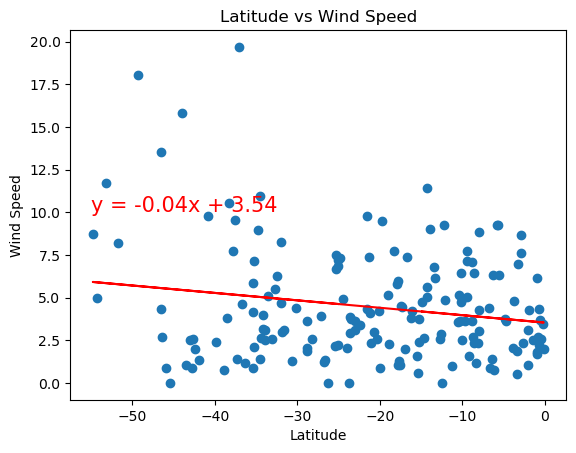

In [25]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis,y_axis,"Wind Speed","Latitude vs Wind Speed",(-55,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE